In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
for dirname, _, filenames in os.walk('../smvc_credit/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../smvc_credit/input\creditcard.csv


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../smvc_credit/input/creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [7]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,166198,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
1,52997,-34.148234,18.902453,-33.680984,6.648835,-23.669726,-4.472917,-24.419483,16.635979,-3.957251,...,-0.603248,-1.689064,-0.965298,0.131674,2.319682,-0.237727,0.964016,0.456214,1.00,0
2,41864,-32.962810,18.183626,-32.965346,6.596083,-23.505167,-4.639617,-22.518547,18.709255,-3.747177,...,0.587373,-2.026372,-1.219814,0.162653,2.328541,-0.216531,1.120581,0.379304,89.99,0
3,41508,-32.273470,17.930550,-32.454198,6.555152,-23.236404,-4.487066,-22.030417,18.282168,-3.797563,...,0.581454,-1.931440,-0.895689,0.143893,2.343341,-0.211100,1.129057,0.377602,89.99,0
4,41501,-31.746663,17.418649,-31.813586,6.590421,-22.245025,-4.827882,-22.291962,17.941363,-3.776069,...,0.631021,-1.950280,-1.178763,0.149984,2.205306,-0.230525,1.063696,0.437115,1.00,0


Distribution graphs (histogram/bar graph) of sampled columns:

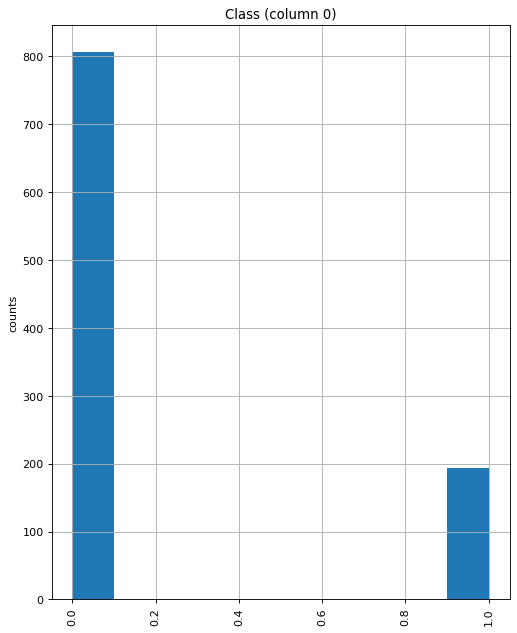

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

<ipython-input-4-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


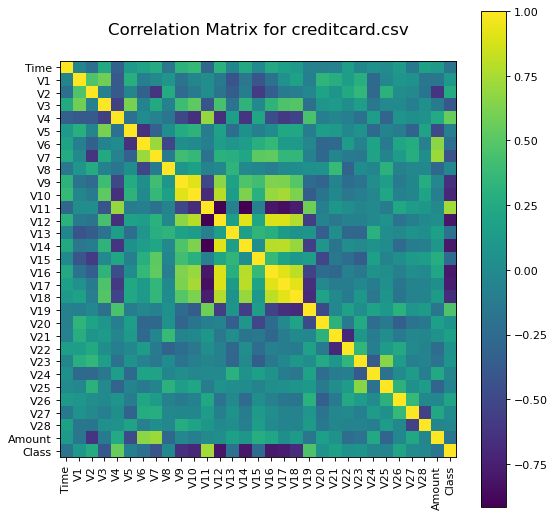

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

<ipython-input-5-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


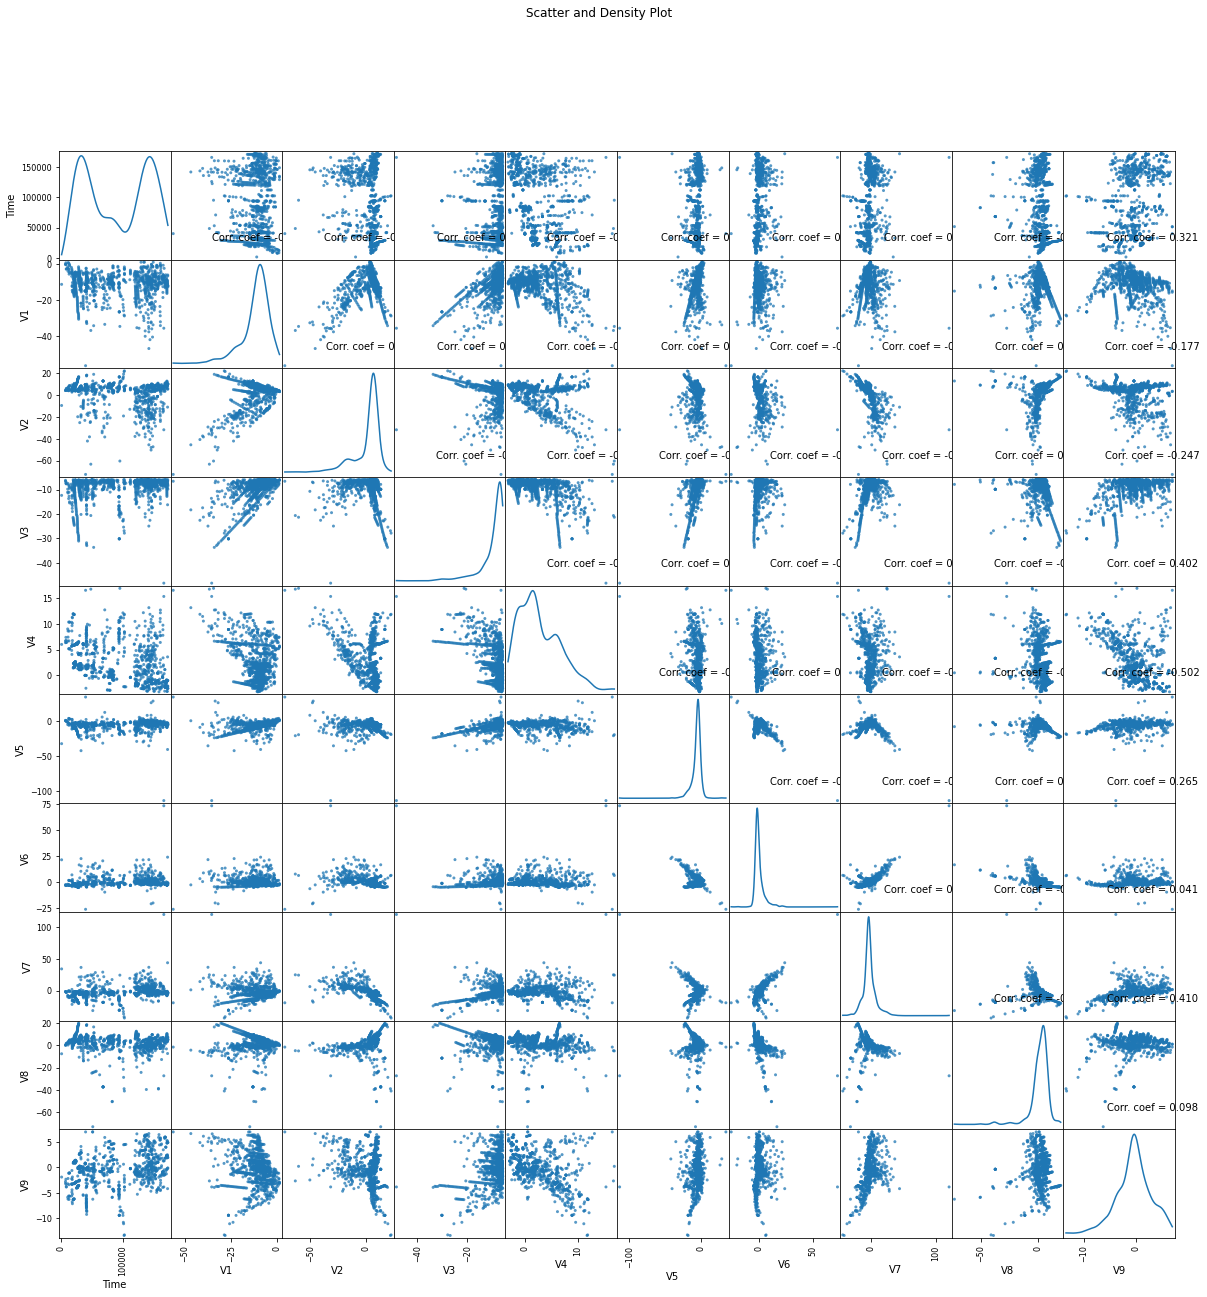

In [10]:
plotScatterMatrix(df1, 20, 10)

In [11]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<a id="split"></a>
### Split the data for training

In [12]:
y = df1['Class']

In [13]:
x = df1.drop(columns=['Time', 'Amount'])

In [14]:
x = x.to_numpy()
y = y.to_numpy()

In [15]:
y[np.where(y == 0)] = -1

In [16]:
w = np.ones(len(x[0]))

<a id="implementation"></a>
# Implementation

<a id="loss_fn"></a>
#### Loss function

In [17]:
def hinge_loss_fn(y, y_hat):
    return np.maximum(0,(np.ones(len(y)) - y * y_hat))

<a id="forward_fn"></a>
#### Forward function

In [18]:
def forward(x, w):
    return np.dot(x, w)

<a id="svm_fn"></a>
#### SVM function

In [19]:
def svm_fn(x, y, w, epoch):
    if (y * forward(x, w)) < 1:
        return ( (x * y) + (-2  * (1/epoch) * w) )
    else:
        return (-2 * (1/epoch) * w)

<a id="optimize_fn"></a>
#### Optimize function (SGD)

In [20]:
def optimize(w, dw, lr):
    w += lr * dw
    return w

<a id="training_fn"></a>
#### Training function

In [21]:
def svm(x, y, w, epochs=1601, lr=0.001):

    losses = []
    
    for epoch in range(1,epochs):
        for i, _ in enumerate(x):
            dw = svm_fn(x[i], y[i], w, epoch)
            w = optimize(w, dw, lr)
                
        if(epoch % 100 == 0):
            loss = hinge_loss_fn(y, np.dot(x, w)).mean()
            losses.append(loss)
            print("Epoch ", epoch, " - Hinge Loss ", loss)

    return w, losses

In [22]:
w = np.zeros(len(x[0]))

In [23]:
w, losses = svm(x, y, w)

Epoch  100  - Hinge Loss  0.24644140751750768
Epoch  200  - Hinge Loss  0.23407562228834985
Epoch  300  - Hinge Loss  0.20270383763928093
Epoch  400  - Hinge Loss  0.37937518530310793
Epoch  500  - Hinge Loss  0.30949966462028045
Epoch  600  - Hinge Loss  0.257238040354181
Epoch  700  - Hinge Loss  0.25474987052107995
Epoch  800  - Hinge Loss  0.21930108363113118
Epoch  900  - Hinge Loss  0.2721300538466365
Epoch  1000  - Hinge Loss  0.24507944998899645
Epoch  1100  - Hinge Loss  0.22739536342967334
Epoch  1200  - Hinge Loss  0.20217395308466285
Epoch  1300  - Hinge Loss  0.1420704544600629
Epoch  1400  - Hinge Loss  0.13942015795531726
Epoch  1500  - Hinge Loss  0.10765930523209218
Epoch  1600  - Hinge Loss  0.08788909624255677


In [24]:
pred = forward(x, w)

<a id="results"></a>
# Results analysis

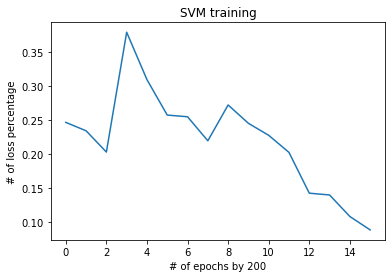

In [25]:
plt.title('SVM training')
plt.xlabel('# of epochs by 200')
plt.ylabel('# of loss percentage')
plt.plot(losses)

In [26]:
def accuracy(y_hat, y):
    # get the number of card frauds predicted
    pred_fraud = len(np.where(np.ceil(pred) > 0)[0])
    # actual fraud numbers
    actual_fraud = len(np.where(y > 0)[0])
    
    return pred_fraud/actual_fraud

In [27]:
accuracy(pred, y)

0.8298969072164949